<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/HW10_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [10]:
from sklearn import datasets

digits = datasets.load_digits()

# 1. Do clustering on the digits dataset from sklearn using at least three different approaches (k-means, hierarchical, birch)


## K-means

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [12]:
model_kmeans = KMeans(n_clusters=10)
model_kmeans.fit(digits.data)
data_clusters_kmeans = model_kmeans.predict(digits.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering


In [14]:
model_agglom = AgglomerativeClustering(n_clusters=10)
data_clusters_agglom = model_agglom.fit_predict(digits.data)

## Birch

In [15]:
from sklearn.cluster import Birch

In [16]:
birch = Birch(n_clusters=10)
data_clusters_birch = birch.fit_predict(digits.data)

# 2. Evaluate the quality of clustering using three metrics from the lecture

In [17]:
X_data = digits.data
y = digits.target

In [18]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Calculate ARI, AMI, and Silhouette Score for K-Means clustering
kmeans_ari = adjusted_rand_score(y, data_clusters_kmeans)
kmeans_ami = adjusted_mutual_info_score(y, data_clusters_kmeans)
kmeans_silhouette = silhouette_score(X_data, data_clusters_kmeans)

# Calculate ARI, AMI, and Silhouette Score for Hierarchical clustering
hierarchical_ari = adjusted_rand_score(y, data_clusters_agglom)
hierarchical_ami = adjusted_mutual_info_score(y, data_clusters_agglom)
hierarchical_silhouette = silhouette_score(X_data, data_clusters_agglom)

# Calculate ARI, AMI, and Silhouette Score for BIRCH clustering
birch_ari = adjusted_rand_score(y, data_clusters_birch)
birch_ami = adjusted_mutual_info_score(y, data_clusters_birch)
birch_silhouette = silhouette_score(X_data, data_clusters_birch)

# Print the evaluation metrics
print("K-Means Clustering Metrics:")
print(f"Adjusted Rand Index: {kmeans_ari:.4f}")
print(f"Adjusted Mutual Information: {kmeans_ami:.4f}")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print("\n")

print("Hierarchical Clustering Metrics:")
print(f"Adjusted Rand Index: {hierarchical_ari:.4f}")
print(f"Adjusted Mutual Information: {hierarchical_ami:.4f}")
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")
print("\n")

print("BIRCH Clustering Metrics:")
print(f"Adjusted Rand Index: {birch_ari:.4f}")
print(f"Adjusted Mutual Information: {birch_ami:.4f}")
print(f"Silhouette Score: {birch_silhouette:.4f}")


K-Means Clustering Metrics:
Adjusted Rand Index: 0.6649
Adjusted Mutual Information: 0.7414
Silhouette Score: 0.1825


Hierarchical Clustering Metrics:
Adjusted Rand Index: 0.7940
Adjusted Mutual Information: 0.8668
Silhouette Score: 0.1785


BIRCH Clustering Metrics:
Adjusted Rand Index: 0.7940
Adjusted Mutual Information: 0.8668
Silhouette Score: 0.1785


# 3. Apply dimensionality reduction, then do clustering and calculate metrics.

In [5]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=59a6ecf44c6a7f294bd729d19cfa4a69f1c1a7ee11acd9a9b993f262a7289357
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=1453dde0ecc47fa4e75a91a2d1c234bfddea27b524187c77a152ead7e39025a0
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for K-Means Clustering (PCA):
Adjusted Rand Index: 0.3892
Adjusted Mutual Information: 0.5216
Silhouette Score: 0.3926


Metrics for K-Means Clustering (t-SNE):
Adjusted Rand Index: 0.8891
Adjusted Mutual Information: 0.9107
Silhouette Score: 0.6420


Metrics for K-Means Clustering (UMAP):
Adjusted Rand Index: 0.9133
Adjusted Mutual Information: 0.9321
Silhouette Score: 0.7248


Metrics for Agglomerative Clustering Clustering (PCA):
Adjusted Rand Index: 0.3428
Adjusted Mutual Information: 0.4972
Silhouette Score: 0.3525


Metrics for Agglomerative Clustering Clustering (t-SNE):
Adjusted Rand Index: 0.8873
Adjusted Mutual Information: 0.9102
Silhouette Score: 0.6389


Metrics for Agglomerative Clustering Clustering (UMAP):
Adjusted Rand Index: 0.9144
Adjusted Mutual Information: 0.9354
Silhouette Score: 0.7215


Metrics for BIRCH Clustering (PCA):
Adjusted Rand Index: 0.3700
Adjusted Mutual Information: 0.4934
Silhouette Score: 0.3168


Metrics for BIRCH Clustering (t-SNE):
Adju

<ipython-input-32-1b8b1627a4ac>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


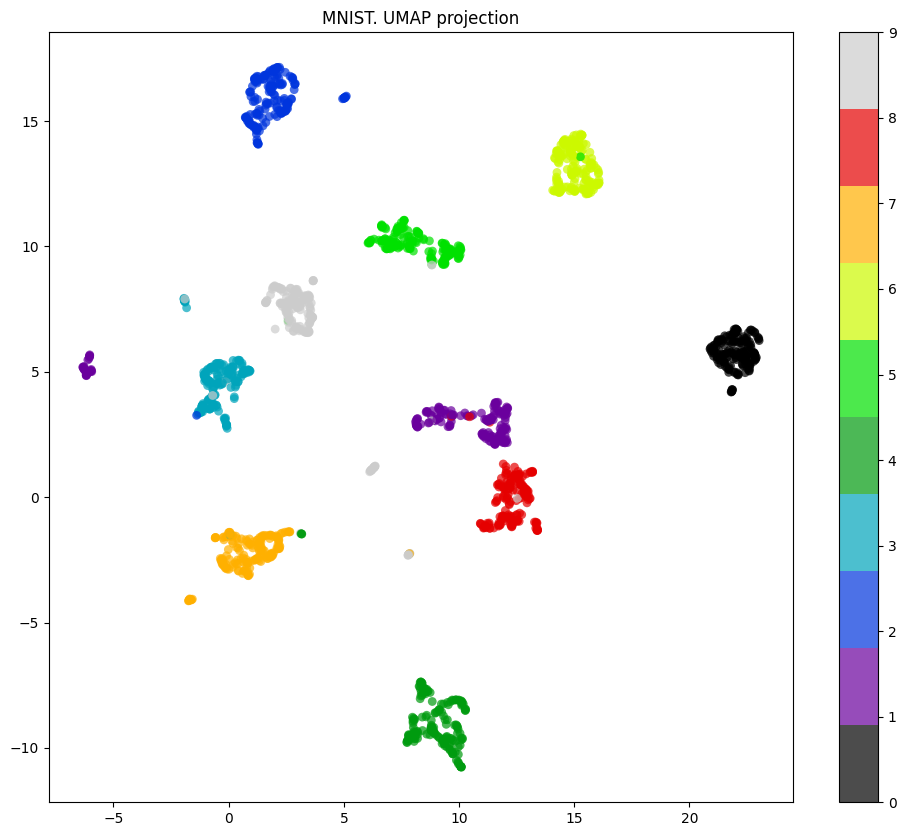

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Dimensionality reduction using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42,n_neighbors=5, min_dist = 0.1)
X_umap = umap_model.fit_transform(X)

# Define clustering algorithms
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=10, random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=10),
    "BIRCH": Birch(n_clusters=10),
}

# Perform clustering and calculate metrics for each combination
for method_name, clustering_algorithm in clustering_algorithms.items():
    # Fit the clustering algorithm on PCA-reduced data
    labels_pca = clustering_algorithm.fit_predict(X_pca)

    # Fit the clustering algorithm on t-SNE-reduced data
    labels_tsne = clustering_algorithm.fit_predict(X_tsne)

    # Fit the clustering algorithm on UMAP-reduced data
    labels_umap = clustering_algorithm.fit_predict(X_umap)

    # Calculate metrics for PCA-reduced data
    ari_pca = adjusted_rand_score(y, labels_pca)
    ami_pca = adjusted_mutual_info_score(y, labels_pca)
    silhouette_pca = silhouette_score(X_pca, labels_pca)

    # Calculate metrics for t-SNE-reduced data
    ari_tsne = adjusted_rand_score(y, labels_tsne)
    ami_tsne = adjusted_mutual_info_score(y, labels_tsne)
    silhouette_tsne = silhouette_score(X_tsne, labels_tsne)

    # Calculate metrics for UMAP-reduced data
    ari_umap = adjusted_rand_score(y, labels_umap)
    ami_umap = adjusted_mutual_info_score(y, labels_umap)
    silhouette_umap = silhouette_score(X_umap, labels_umap)

    # Print the evaluation metrics for each combination
    print(f"Metrics for {method_name} Clustering (PCA):")
    print(f"Adjusted Rand Index: {ari_pca:.4f}")
    print(f"Adjusted Mutual Information: {ami_pca:.4f}")
    print(f"Silhouette Score: {silhouette_pca:.4f}")
    print("\n")

    print(f"Metrics for {method_name} Clustering (t-SNE):")
    print(f"Adjusted Rand Index: {ari_tsne:.4f}")
    print(f"Adjusted Mutual Information: {ami_tsne:.4f}")
    print(f"Silhouette Score: {silhouette_tsne:.4f}")
    print("\n")

    print(f"Metrics for {method_name} Clustering (UMAP):")
    print(f"Adjusted Rand Index: {ari_umap:.4f}")
    print(f"Adjusted Mutual Information: {ami_umap:.4f}")
    print(f"Silhouette Score: {silhouette_umap:.4f}")
    print("\n")

plt.figure(figsize=(12,10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=digits.target,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. UMAP projection');

# 4. Make a comparison table of different clustering approaches with and without dimensionality reduction.

In [6]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from prettytable import PrettyTable

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Dimensionality Reduction", "Clustering Algorithm", "ARI", "AMI", "Silhouette Score"]

# Define dimensionality reduction techniques
dimensionality_reduction_methods = [
    ("No Reduction", None),
    ("PCA", PCA(n_components=2)),
    ("t-SNE", TSNE(n_components=2, random_state=42)),
    ("UMAP", umap.UMAP(n_components=2, random_state=42)),
]

# Define clustering algorithms
clustering_algorithms = [
    ("K-Means", KMeans(n_clusters=10, random_state=42)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=10)),
    ("Birch", Birch(n_clusters=10)),
]

# Iterate through dimensionality reduction methods and clustering algorithms
for reduction_method_name, reduction_method in dimensionality_reduction_methods:
    for clustering_name, clustering_algorithm in clustering_algorithms:
        # Apply dimensionality reduction
        if reduction_method is not None:
            X_reduced = reduction_method.fit_transform(X)
        else:
            X_reduced = X

        # Cluster the data
        labels = clustering_algorithm.fit_predict(X_reduced)

        # Calculate metrics
        ari = adjusted_rand_score(y, labels)
        ami = adjusted_mutual_info_score(y, labels)
        silhouette = silhouette_score(X_reduced, labels)

        # Add row to the table
        table.add_row([reduction_method_name, clustering_name, f"{ari:.4f}", f"{ami:.4f}", f"{silhouette:.4f}"])

# Print the table
print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+--------------------------+--------------------------+--------+--------+------------------+
| Dimensionality Reduction |   Clustering Algorithm   |  ARI   |  AMI   | Silhouette Score |
+--------------------------+--------------------------+--------+--------+------------------+
|       No Reduction       |         K-Means          | 0.6650 | 0.7389 |      0.1824      |
|       No Reduction       | Agglomerative Clustering | 0.7940 | 0.8668 |      0.1785      |
|       No Reduction       |          Birch           | 0.7940 | 0.8668 |      0.1785      |
|           PCA            |         K-Means          | 0.3892 | 0.5216 |      0.3926      |
|           PCA            | Agglomerative Clustering | 0.3428 | 0.4972 |      0.3525      |
|           PCA            |          Birch           | 0.3700 | 0.4934 |      0.3168      |
|          t-SNE           |         K-Means          | 0.8891 | 0.9107 |      0.6420      |
|          t-SNE           | Agglomerative Clustering | 0.8873 | 0.910


# 5. Make a conclusion about how to perform validation and what metrics to use in a real-life task


As discussed on Q & A session - Silhouette is not a reliable metric so it's better to try to transofrm our problem from Unsupervised to Supervised by providing some labels to some part of dataset.